<a href="https://colab.research.google.com/github/PrinceKrThakur/DataGeneration_LinearRegression/blob/main/DataGeneration_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt


[-2.31241021e+00  9.54117582e+00 -1.29694164e+01  1.20143105e+01
 -2.04855292e+00  2.11565164e-01 -3.45696564e+00  2.55588010e+01
 -1.20901071e+01  1.77046843e+01  1.57793185e+01  7.75059059e+00
 -1.07186030e+01  3.39230329e+00 -5.25227634e+00 -1.15844379e+01
 -5.61476908e+00 -1.47445838e+01 -1.26556305e+01  1.37701491e+00
  8.82132208e+00  8.65646152e+00  8.65206220e+00 -2.34160825e+00
  1.37373705e+01  1.08056552e+01 -4.14923503e+00  1.47704025e+01
  5.95710977e+00 -7.94723128e+00  4.36703769e+00 -9.62109896e+00
  3.91903468e+00 -1.27189290e+01 -8.05500967e-01 -1.69273355e+01
 -1.06052379e+00 -9.56364367e-01  5.33676803e+00  8.68574993e+00
  9.29090915e+00  5.05709857e+00 -2.20576076e+00 -5.60030325e+00
 -1.26052445e+00  1.23656515e+01  3.46398326e+00 -8.44940966e+00
  2.06158594e+00 -1.64150189e+01 -1.40673489e+01  5.16594427e+00
  6.64138356e+00  8.75875750e+00 -2.95530390e+00  4.80550471e+00
  9.11627190e+00  1.51322393e+00  2.39204696e+01  7.36547027e-01
 -3.36704842e+00 -3.76975

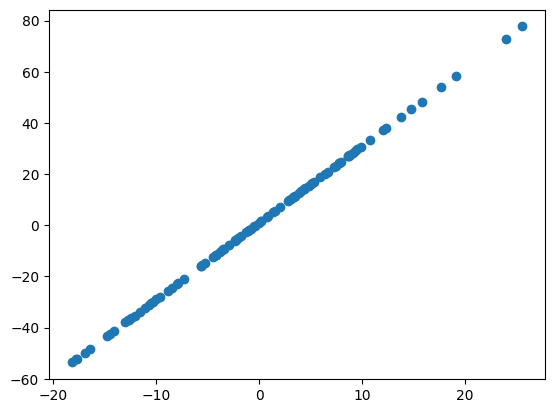

In [ ]:
#data generation X,Y without noise
m = 100
X = np.random.randn(m)*10#this will range from 0 to 1 if we multiply with say10
#then data set will vary from -10 to +10
print(X)

print(X.mean(), X.std())
Y = 3*X+1 #defined a random function

plt.scatter(X,Y)

In [ ]:
#data generation function(X,Y) with noise
def generateDataset(m):
    X = np.random.randn(m)*10  #this will range from 0 to 1 if we
    # multiply with say 10 then data set will vary from -10 to +10
    noise = np.random.randn(m)
    y = 3*X+1+5*noise #defined a random function
    return X,y



In [ ]:
#plotting function
def plotData(X,y,color = "orange",title='Data'):
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("y")
    plt.scatter(X,y,c=color)
    plt.show()

(100,) (100,)


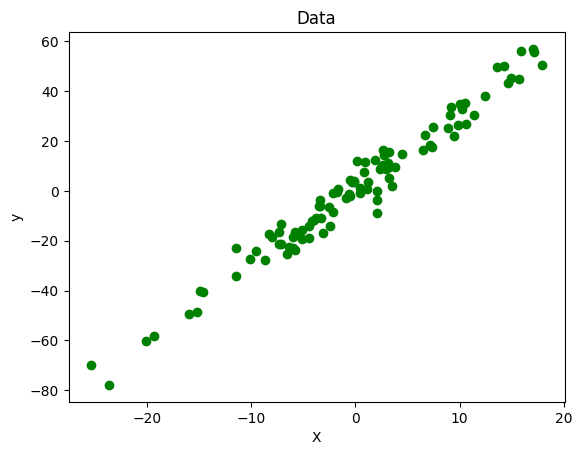

In [ ]:
X,y = generateDataset(100)
print(X.shape,y.shape)
plotData(X,y,color ="green", )

In [ ]:
def normalization(X):
    X = (X-X.mean())/X.std()
    return X

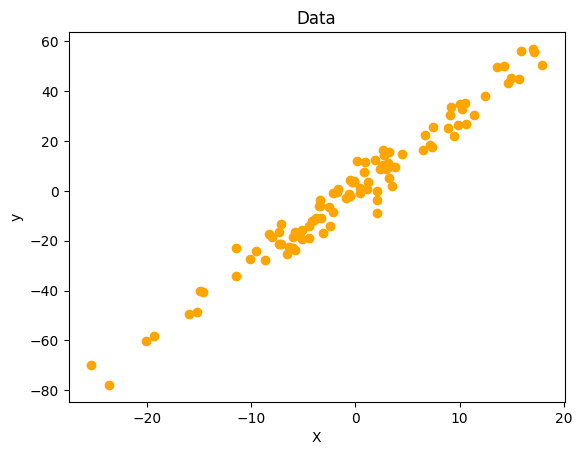

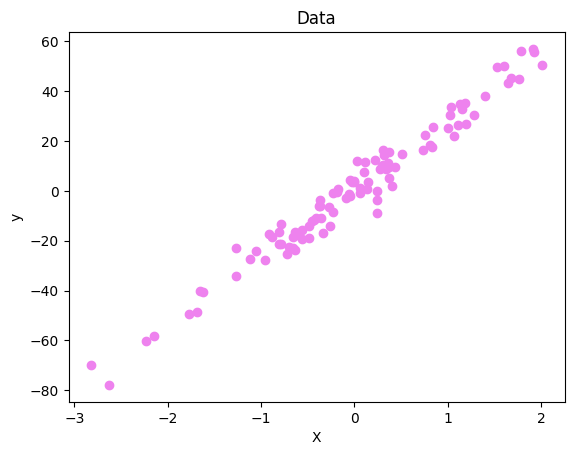

In [ ]:
plotData(X,y)
X = normalization(X)
plotData(X,y,color = "violet")

In [ ]:
X.mean()

1.6653345369377347e-17

In [ ]:
def trainAndSplit(X,y,split = 0.8):
    m = X.shape[0]
    data = np.zeros((m,2))#zeroes mean that the matrix will first filled with zeores and it is mX2 matrix
    data[:,0] =X
    data[:,1] =y
    np.random.shuffle(data)
    split = int(m*split)
    XT = data[:split,0]
    yT = data[:split,1]

    Xt = data[split: ,0]
    yt = data[split: ,1]
    return XT,yT,Xt,yt

In [ ]:
XT,yT,Xt,yt = trainAndSplit(X,y)

In [ ]:
print(XT.shape,yT.shape)
print(Xt.shape,yt.shape)

(80,) (80,)
(20,) (20,)


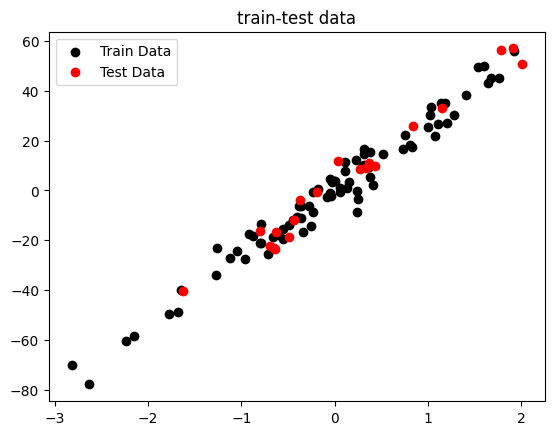

In [ ]:
plt.scatter(XT,yT,color="black", label = "Train Data")
plt.scatter(Xt,yt,color="red", label = "Test Data")
plt.title("train-test data")
plt.legend()
plt.show()

In [ ]:
def hypothesis(X,theta):
    return theta[0] +theta[1]*X

def error(X,y,theta):
    m = X.shape[0]
    e=0
    for i in range(m):
      y_i = hypothesis(X[i],theta)
      e = e + (y[i] - y_i)**2

    return e/(2*m)

def gradient(X,y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))

    for i in range(m):
      exp = hypothesis(X[i],theta)-y[i]

      grad[0] += exp
      grad[1] += exp*X[i]
    return grad/m



def train(X,y,learning_rate = 0.1):
    theta = np.zeros((2,))

    maxItrs = 100
    error_list = []

    for i in range (maxItrs):
      grad = gradient(X,y,theta)
      error_list.append(error(X,y,theta))
      theta[0] = theta[0] - learning_rate * grad[0]
      theta[1] = theta[1] - learning_rate * grad[1]
    plt.plot(error_list)
    plt.xlabel("Iteration_number")
    plt.ylabel("Loss")
    return theta



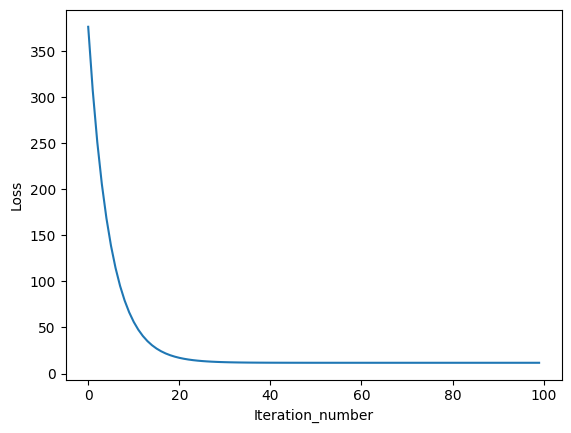

In [ ]:
theta = train(X,y)

In [ ]:
theta#these shows the final trained value of theta

array([ 0.56457588, 26.99992234])

In [ ]:
def predict(X,theta):
  return hypothesis(X,theta)

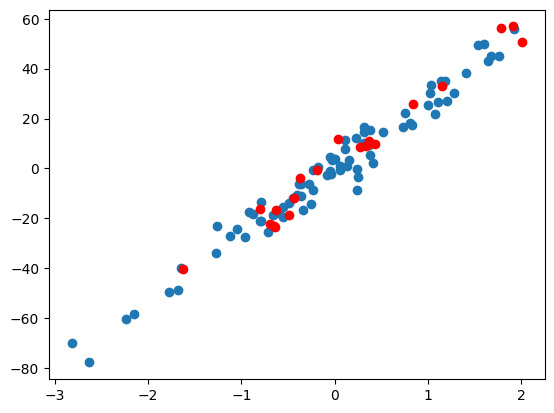

In [ ]:
plt.scatter(XT,yT)
plt.scatter(Xt,yt,color="red")

In [ ]:
yp = predict(Xt,theta)

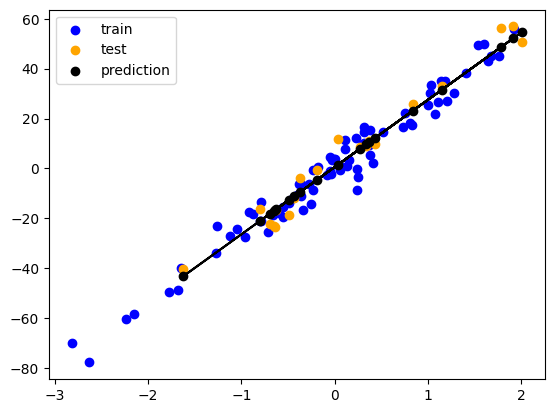

In [ ]:
Xt.shape
plt.scatter(XT,yT,color="blue",label="train")
plt.scatter(Xt,yt,color="orange",label="test")
plt.scatter(Xt,yp,color="black",label="prediction")
plt.plot(Xt,yp,color="black")
plt.legend()
plt.show()

In [ ]:
yp.shape

(20,)

R2 Score: It measures of how well the regression predictions approximate the real data points
It must lies between 0 and 1. 0 means it gives predicted values as mean of test val. 1 means the predicted points fits to the given data points.

In [ ]:
#evaluation
def r2score(y,yp):
  ymean = y.mean()
  num = np.sum((y-yp)**2)
  denom = np.sum((y-ymean)**2)
  return 1-num/denom

r2score(yt,yp)

0.9707768358674189

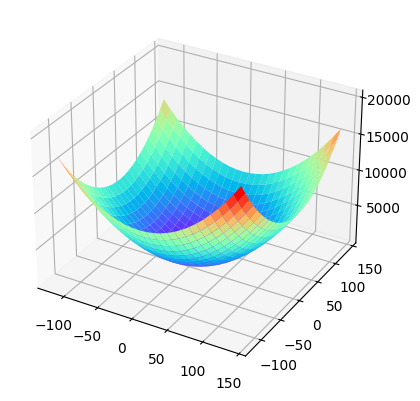

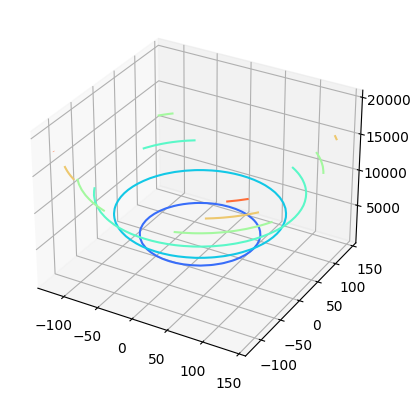

In [ ]:
#visualization the training process
#optional

T0 = np.arange(-120,150,10)
T1 = np.arange(-120,150,10)

T0,T1 = np.meshgrid(T0,T1)
J=np.zeros(T0.shape)
for i in range (J.shape[0]):
  for j in range(J.shape[1]):
    yp = T1[i,j]*X + T0[i,j]
    J[i,j] = np.mean((y-yp)**2)/2

fig = plt.figure()
axes = fig.add_subplot(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
plt.show()

fig = plt.figure()
axes = fig.add_subplot(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
plt.show()